<a href="https://colab.research.google.com/github/rakesh4real/swift4tensorflow/blob/master/05_01_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [0]:
import Python // Visualisations
import TensorFlow

In [174]:
let plt = Python.import("matplotlib.pyplot")
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


# Prepare Dataset

In [0]:
// create

In [0]:
let num_of_data_points: Int = 10
var X = Tensor<Float>(rangeFrom: 0, to: 10, stride: 1)

let slope: Float = 2.0 
let intercept: Float = 3.0
let error = ( Tensor<Float>(randomNormal: [10]) ) * 0.8

let y: Tensor<Float> = slope * X + intercept + error

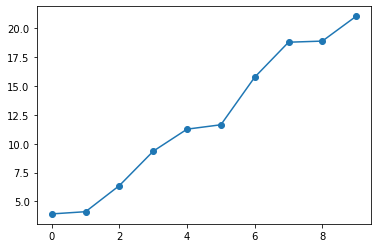

None


In [177]:
plt.close();
plt.plot(X.makeNumpyArray(), y.makeNumpyArray(), marker: "o")
plt.show();

# Split

In [0]:
// Shuffle
var shuffled_indices = Array<Int>(0..<X.scalarCount).shuffled()
var shuffled_X = Tensor<Float>(zeros: [X.scalarCount]) // will be replaced
var shuffled_y = Tensor<Float>(zeros: [X.scalarCount]) // will be replaced

for i in 0..<X.scalarCount{
  shuffled_X[i] = X[shuffled_indices[i]]
  shuffled_y[i] = X[shuffled_indices[i]]
}

// print(shuffled_X.description)

In [0]:
var split_percent: Float = 0.8
var train_count: Int = Int( Float(shuffled_X.scalarCount) * percent )

In [0]:
// generate test - train
let train_x = shuffled_X.slice(lowerBounds: [0], upperBounds: [train_count])
let test_x = shuffled_X.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])
let train_y = shuffled_y.slice(lowerBounds: [0], upperBounds: [train_count])
let test_y = shuffled_y.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])

/*
print(train_x.scalarCount)
print(train_y.scalarCount)
print(test_x.scalarCount)
print(test_y.scalarCount)
*/

// add bias to x_train for mx+'c'
// reshape both(ones & train_x) before concatenation
var ones_train = Tensor<Float>(ones: [train_count, 1])
var x_train_with_bias = train_x.reshaped(to: [train_count,1]).concatenated(with: ones_train, alongAxis: 1)

var ones_test = Tensor<Float>(ones: [(num_of_data_points - train_count), 1])
var x_test_with_bias = test_x.reshaped(to: [num_of_data_points - train_count, 1]).concatenated(with: ones_test, alongAxis: 1)

# Loss Function

In [0]:
@differentiable
func cost(predicted: Tensor<Float>, true_measure: Tensor<Float>) -> Tensor<Float>{
  let m: Float = Float( predicted.scalarCount )
  return (1 / (2 * m) ) * pow(predicted - true_measure, 2).sum()
}

In [0]:
var theta = Tensor<Float>(randomNormal: [2, 1])

In [304]:
var pred = theta.transposed()*x_train_with_bias
var grad = gradient(at: pred, x_train_with_bias, in:cost)

print(grad.0.shape)
print(pred.shape)
print(x_train_with_bias.shape)

var loss = cost(predicted: pred, true_measure: x_train_with_bias)
print("--> \(loss)")


for i in 1...10{
  var predc = theta.transposed()*x_train_with_bias
  var grad = gradient(at: pred, x_train_with_bias, in:cost)
  var temp = predc + grad.1
  var predc = temp
  var grad = gradient(at: predc, x_train_with_bias, in:cost)
  var lossc = cost(predicted: predc, true_measure: x_train_with_bias)
  print("--> \(lossc)")
}


: ignored

In [0]:

var predc = pred + grad.0
var lossc = cost(predicted: predc, true_measure: x_test_with_bias)
print("--> \(lossc)")